Ecole Normale Supérieure de l'Enseignement Technique - Mohammedia<br>
Master : Systèmes Distribués et Intelligence Artificielle<br>
Module : Bases de l'intellegence artificielle<br>
<b>IGUIDER Amine</b><br>
Année universitaire 2023 - 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dt = pd.read_csv('fish.csv')

# Introduction et analyse des données

Ce jeu de données est utilisér prédire le poids du poisson en fonction des données de mesure corporelle de sept types d'espèces de poissons à partir de plusiers facteurs concernant leur les longuers mésurer et aussi le type d'espèce.

## Comprendre les données




In [3]:
dt.head()

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
dt.shape

(159, 7)

Il se construite par 7 colonnes avec un seul target **Weight** et 6 features et 159 lignes pour la phase d'entraînement. Le tableau suivant explique chaque colonne et sa signification :
<table>
    <tr>
        <th>Colonne</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Species</td>
        <td>Nom de l'espèce de poisson</td>
    </tr>
    <tr>
        <td>Weight</td>
        <td>Poids du poisson en grammes(g)</td>
    </tr>
    <tr>
        <td>VerticalLength</td>
        <td>Longueur verticale en centimètres (cm)</td>
    </tr>
    <tr>
        <td>DiagonalLength</td>
        <td>Longueur diagonale en centimètres (cm)</td>
    </tr>
    <tr>
        <td>CrossLength</td>
        <td>Longueur transversale en centimètres (cm)</td>
    </tr>
    <tr>
        <td>Height</td>
        <td>Hauteur en centimètres (cm)</td>
    </tr>
    <tr>
        <td>Width</td>
        <td>Largeur diagonale en centimètres (cm)</td>
    </tr>
</table>

## Analyse et nettoyage

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   VerticalLength  159 non-null    float64
 3   DiagonalLength  159 non-null    float64
 4   CrossLength     159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
dt.isna().sum()

Species           0
Weight            0
VerticalLength    0
DiagonalLength    0
CrossLength       0
Height            0
Width             0
dtype: int64

Cette analyse nos montre que nous avons aucune données nulles

In [7]:
dt.describe()

,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Chaque colonne (sauf. le type d'espèce) représent une quantité numérique et strictement positif. Ce tableau nos montre qu'il y'a un ou pluisieurs lignes dont le poids (**Weight**) est nulle. Ce qu'est illogique, on supprime cherche ces lignes puis on l'est suppriment.

In [8]:
null_weight = dt[dt.Weight == 0]
null_weight

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [9]:
dt.drop(null_weight.index, inplace=True)

In [10]:
dt.shape

(158, 7)

À ce moment, on peut bien distinguer que la ligne est supprimé

<Axes: >

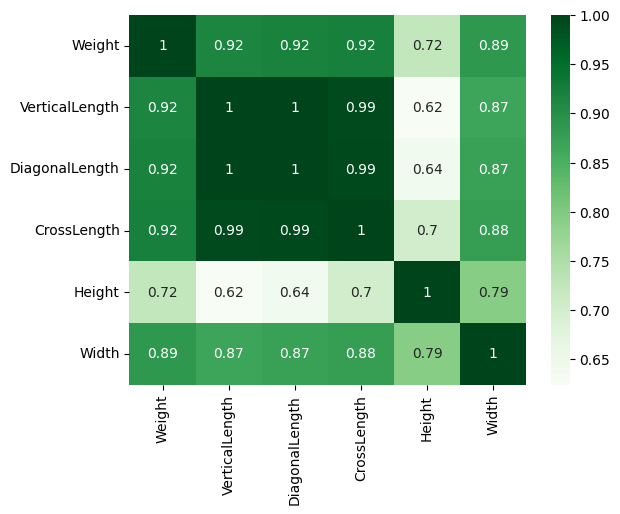

In [11]:
sns.heatmap(dt.corr(numeric_only=True), annot=True, cmap="Greens")

On remarque qu'il y'a une intercorrelation extrème entre les trois features **CrossLength**, **DiagonalLength** et **VerticalLength**. On supprime les deux dérniers pour éviter le problème d'intecorrelation.

In [12]:
dt.drop(['VerticalLength', 'DiagonalLength'], axis = 1, inplace=True)

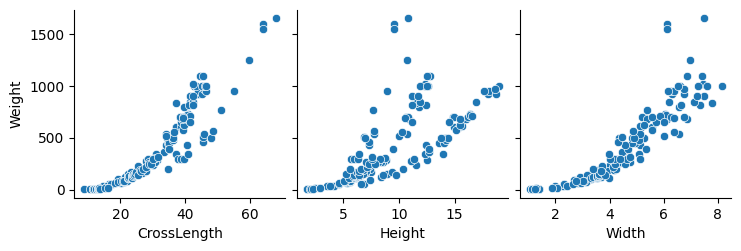

In [13]:
sns.pairplot(data=dt, y_vars=["Weight"], x_vars=["CrossLength", "Height", "Width"])

D'après ce graphe, on peut distinguer qu'il y'a une certain correlation **polynomiale** entre le poinds du poissons **Weight** et autres trois features. Il s'agit d'un regression polynomiale.

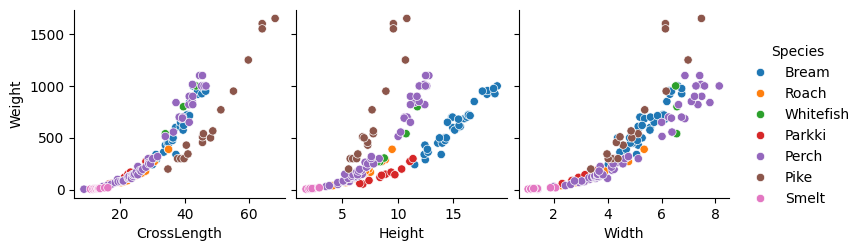

In [14]:
sns.pairplot(data=dt, hue='Species', y_vars=["Weight"], x_vars=["CrossLength", "Height", "Width"])

In [15]:
dt.Species.value_counts()

Species
Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

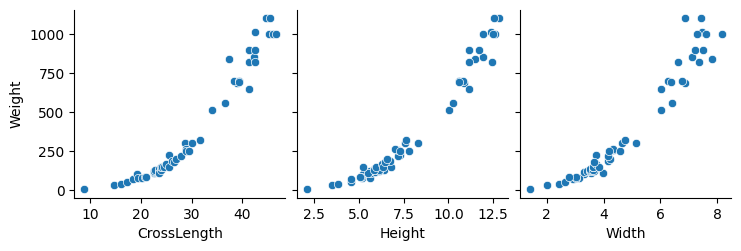

In [16]:
perch = dt[dt.Species == "Perch"]
sns.pairplot(data=perch, y_vars=["Weight"], x_vars=["CrossLength", "Height", "Width"])

# Création du modèle : regression polynomiale

D'après la phase d'analyse, nous avons arriver à constater que la variation de chaque feature avec notre target est polynomiale. On s'intéresse à construire un modèle de regression polynomiale tel que :
\begin{equation*}
y = a_0 + a_1x + a_2x^2 + \; ... \; + a_nx^n
\end{equation*}

## Préparation des données

In [17]:
class SplittedData:

    def __init__(self, train, test):
        self.train = train
        self.test = test

In [18]:
class Data:

    def __init__(self, features, target):
        self.dim = len(features)
        shape = (self.dim, 1)
        self.features = features.reshape(shape) if features.ndim < 2 else features
        self.target = target.reshape(shape)

    def split(self, test_size=0.4, random_state=42):
        x_tn, x_ts, y_tn, y_ts = train_test_split(self.features, self.target, test_size=test_size, random_state=random_state)
        train = Data(x_tn, y_tn) # Créer un object des données d'entrainement
        test = Data(x_ts, y_ts) # Créer un object des données du test
        return SplittedData(train, test)
    
    def normalized(self, inplace=False):
        normalized = (self.features - self.features.mean())/self.features.std()
        if inplace: self.features = normalized
        return normalized

In [19]:
dk = dt[dt.Species == "Perch"]
d = Data(features=dk.Height.values, target=dk.Weight.values)
d.normalized(True)

array([[-2.01582665],
       [-1.51939617],
       [-1.41562257],
       [-1.14623191],
       [-1.14777449],
       [-0.92536241],
       [-0.93349602],
       [-0.78042996],
       [-0.95509215],
       [-0.97458476],
       [-0.7605517 ],
       [-0.68166974],
       [-0.7605517 ],
       [-0.51812114],
       [-0.61418184],
       [-0.77895749],
       [-0.61418184],
       [-0.69656967],
       [-0.82015141],
       [-0.70323081],
       [-0.37508185],
       [-0.6691538 ],
       [-0.9267297 ],
       [-0.55633507],
       [-0.19943801],
       [-0.52127642],
       [-0.39562622],
       [-0.49866359],
       [-0.45606733],
       [-0.24326133],
       [ 0.16166608],
       [-0.2435418 ],
       [-0.28406959],
       [-0.203014  ],
       [-0.0145387 ],
       [-0.09699664],
       [-0.08633881],
       [ 0.76011722],
       [ 0.83952507],
       [ 1.27141257],
       [ 1.05846633],
       [ 0.96314186],
       [ 1.04233935],
       [ 0.95002993],
       [ 1.14807624],
       [ 1

## Implémentation du modèle

In [20]:
class PolynomialFeatures:

    def __init__(self, data):
        self.degree = 1 # The maximum degree of the polynom
        self.data = Data(data.features, data.target) # Shallow copy items to avoid changing previous data
        self.data.features = np.hstack(( data.features, np.ones_like(data.target) )) # Add bias column

    def fit(self, degree):
        diff = degree - self.degree
        if diff < 0: raise ValueError("New degree has to be greater than the previous degree")
        initial_features = self.data.features[:, -2].reshape(self.data.target.shape) # Get the initial features column in last second position
        for _ in range(diff):
            current_column = initial_features * self.data.features[:, 0].reshape(self.data.target.shape)
            self.data.features = np.hstack( (current_column, self.data.features) )

    def reduce(self, degree):
        diff = self.degree - degree
        if diff < 0: raise ValueError("New degree has to be less than the previous degree")
        self.data.features = self.data.features[:, diff:]

    def setDegree(self, degree):
        self.reduce(degree) if degree < self.degree else self.fit(degree)
        self.degree = degree

    def setDegreeByStep(self, step):
        self.setDegree(self.degree + step)

In [21]:
poly_features = PolynomialFeatures(d)
poly_features.setDegree(2)
poly_features.data.features

array([[ 4.06355708e+00, -2.01582665e+00,  1.00000000e+00],
       [ 2.30856473e+00, -1.51939617e+00,  1.00000000e+00],
       [ 2.00398726e+00, -1.41562257e+00,  1.00000000e+00],
       [ 1.31384758e+00, -1.14623191e+00,  1.00000000e+00],
       [ 1.31738627e+00, -1.14777449e+00,  1.00000000e+00],
       [ 8.56295596e-01, -9.25362413e-01,  1.00000000e+00],
       [ 8.71414819e-01, -9.33496020e-01,  1.00000000e+00],
       [ 6.09070916e-01, -7.80429956e-01,  1.00000000e+00],
       [ 9.12201011e-01, -9.55092148e-01,  1.00000000e+00],
       [ 9.49815449e-01, -9.74584757e-01,  1.00000000e+00],
       [ 5.78438891e-01, -7.60551702e-01,  1.00000000e+00],
       [ 4.64673634e-01, -6.81669740e-01,  1.00000000e+00],
       [ 5.78438891e-01, -7.60551702e-01,  1.00000000e+00],
       [ 2.68449515e-01, -5.18121140e-01,  1.00000000e+00],
       [ 3.77219332e-01, -6.14181839e-01,  1.00000000e+00],
       [ 6.06774775e-01, -7.78957493e-01,  1.00000000e+00],
       [ 3.77219332e-01, -6.14181839e-01

In [22]:
class Evaluator:

    def __init__(self, predictions, Y):
        self.pred = predictions
        self.y = Y
        self.m = len(Y)

    @property
    def coef(self):
        u = ((self.y - self.pred)**2).sum()
        v = ((self.y - self.y.mean())**2).sum()
        
        return 1-u/v
    
    @property
    def cost():
        return self.mse / 2

    @property
    def mae(self):
        return np.absolute(self.pred - self.y).sum() / self.m

    @property
    def mse(self):
        return ((self.pred - self.y)**2).sum() / self.m

    @property
    def rmse(self):
        return np.sqrt(self.mse)

class Regression:

    def __init__(self, box : PolynomialFeatures):
        self.box = box
        self.theta = np.zeros(self.box.data.features.shape[1])
    
    def __nabla(self):
        d = self.__splitted.train # Define a variable just to reduce code writing
        return 1/d.dim * d.features.T @ ( d.features @ self.theta - d.target )
    
    def train(self, k = 4000, alpha = 0.001):
        self.theta = np.random.randn(self.box.data.features.shape[1], 1) # Generate a random vector theta
        # Split the data again
        self.__splitted = self.box.data.split()
        for i in range(k):
            self.theta -= alpha * self.__nabla()

    def evaluate(self):
        train_evaluat = Evaluator(self.__splitted.train.features @ self.theta, self.__splitted.train.target)
        test_evaluat = Evaluator(self.__splitted.test.features @ self.theta, self.__splitted.test.target)
        return train_evaluat, test_evaluat

    def plot(self):
        d = self.__splitted.train
        features = d.features[:, -2]
        plt.plot(features, d.target, 'o' , label='Dataset')
        plt.plot(features, d.features @ self.theta, 'o', label='Modèle')
        plt.legend()
        plt.show()

## Testing et Evaluation : Cas des poissons "Perca" ou "Perch"
### Phase d'entrainement
Dans cette phase, on incrémente le degré du polynôme pour évaluer le modèle. Pour chaque degré, on visualise le modèle supposé avec l'affichage des quantités évaluants du modèle.

===== Degree 1 =====
Train :
RMSE : 35.20841660594651
Coefficient de détermination : 0.9895671440124293
Test :
RMSE : 62.89459443582058
Coefficient de détermination : 0.9665293244300038


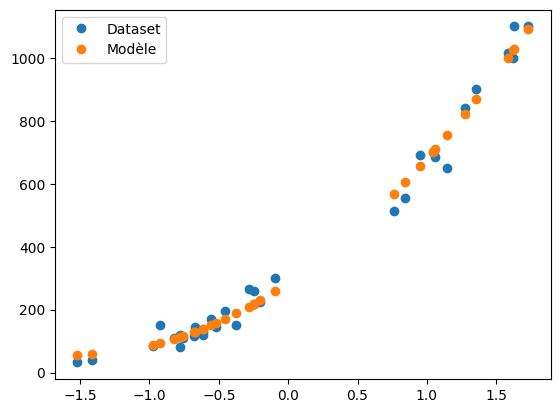

===== Degree 2 =====
Train :
RMSE : 32.803483868248655
Coefficient de détermination : 0.9909437132772573
Test :
RMSE : 66.48421416891568
Coefficient de détermination : 0.9625997146339766


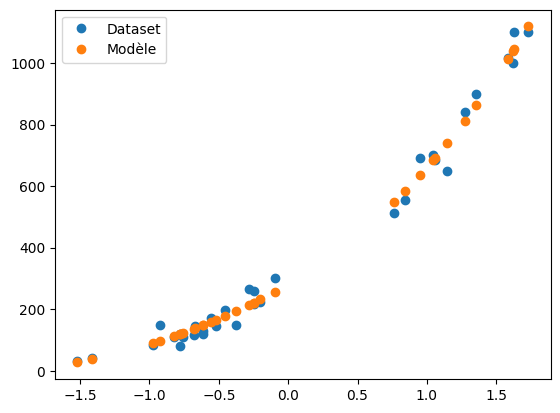

===== Degree 3 =====
Train :
RMSE : 32.581916469332874
Coefficient de détermination : 0.9910656394299797
Test :
RMSE : 67.59291636092122
Coefficient de détermination : 0.9613419266277237


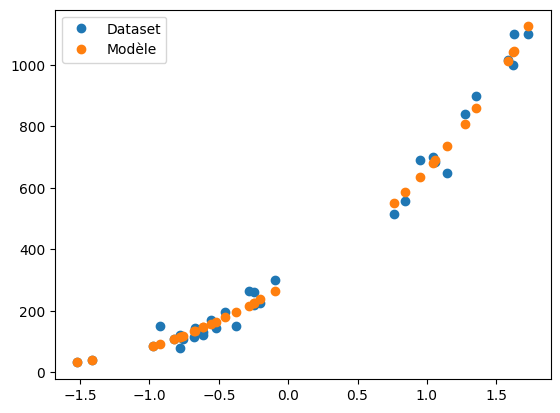

===== Degree 4 =====
Train :
RMSE : 32.344199099470224
Coefficient de détermination : 0.991195533869615
Test :
RMSE : 79.06327368437485
Coefficient de détermination : 0.9471083127025635


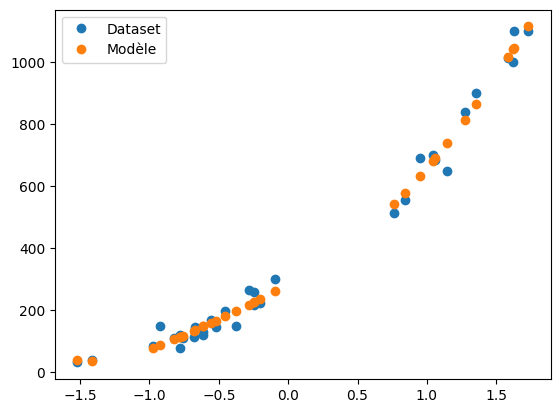

===== Degree 5 =====
Train :
RMSE : 30.900567130084525
Coefficient de détermination : 0.9919639408587075
Test :
RMSE : 180.98937134903846
Coefficient de détermination : 0.7228314311784162


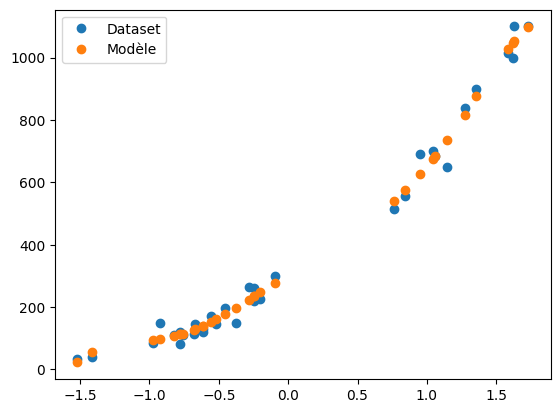

===== Degree 6 =====
Train :
RMSE : 30.94334203399695
Coefficient de détermination : 0.9919416772172174
Test :
RMSE : 211.50400884843532
Coefficient de détermination : 0.6214920174116777


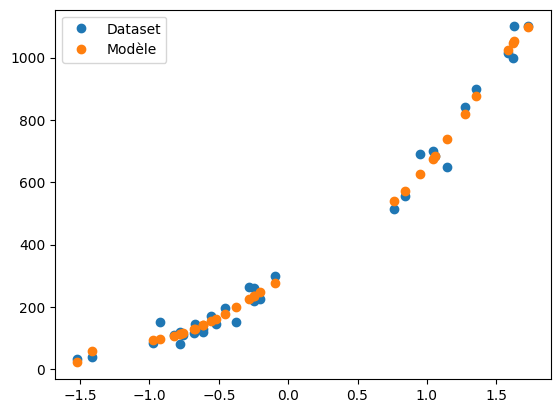

===== Degree 7 =====
Train :
RMSE : 30.986966316148614
Coefficient de détermination : 0.9919189397670791
Test :
RMSE : 185.20424015405737
Coefficient de détermination : 0.7097717474163893


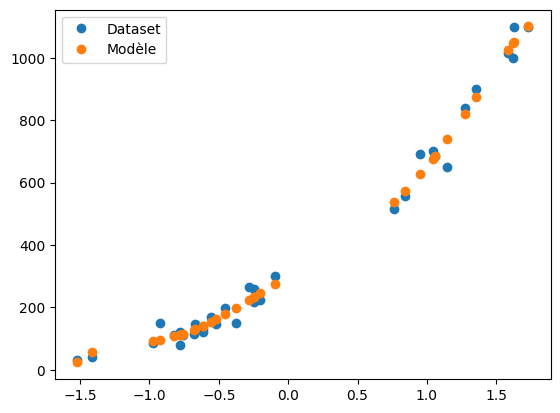

===== Degree 8 =====
Train :
RMSE : 30.86453119494196
Coefficient de détermination : 0.9919826730747286
Test :
RMSE : 80.58689473401628
Coefficient de détermination : 0.9450501287805667


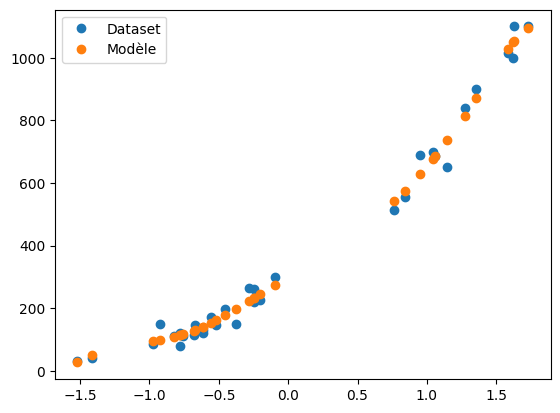

In [23]:
model = Regression(poly_features)
rmse_train = []
rmse_test = []
coef_train = []
coef_test = []
max_degree = 8
for i in range(max_degree):
    print(f" Degree {i + 1} ".center(20, "="))
    model.train(1000000, 0.001)
    ev = model.evaluate()
    # Coefficient de détermination
    coef_train.append(ev[0].coef)
    coef_test.append(ev[1].coef)
    # RMSE
    rmse_train.append(ev[0].rmse)
    rmse_test.append(ev[1].rmse)

    print("Train :")
    print(f"RMSE : {ev[0].rmse}")
    print(f"Coefficient de détermination : {ev[0].coef}")

    print("Test :")
    print(f"RMSE : {ev[1].rmse}")
    print(f"Coefficient de détermination : {ev[1].coef}")
    
    model.plot()
    model.box.setDegreeByStep(1)

### Analyse du coefficient de détermination

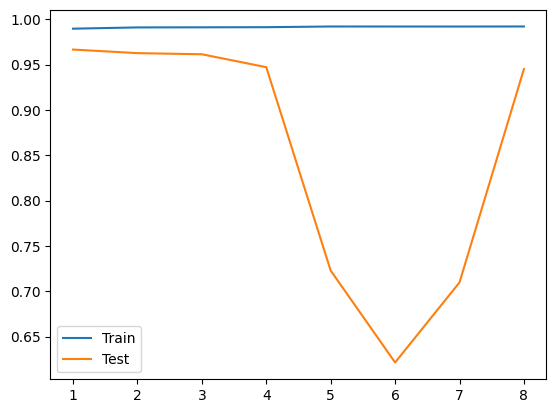

In [24]:
plt.plot(range(1, max_degree + 1),coef_train,label='Train')
plt.plot(range(1, max_degree + 1),coef_test,label='Test')
plt.legend()
plt.show()

### Analyse du RMSE

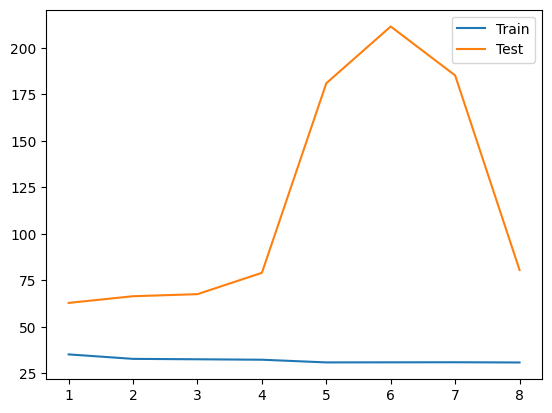

In [25]:
plt.plot(range(1, max_degree + 1),rmse_train,label='Train')
plt.plot(range(1, max_degree + 1),rmse_test,label='Test')
plt.legend()
plt.show()

Dans ce cas, on peut conclure que le modèle est plus mieux au degré 1.